In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from math import sqrt, exp, pi

#### Generar una distribución gaussiana
Se generara una distribución gaussiana a partir del método de aceptación y rechazo usando como base una exponencial.

In [23]:
CANT= 100000
COTA = sqrt(2*exp(1)/pi)
DESVIO = 2
MEDIA = 15
estandar_simulados = []

def gaussian(x):
    return exp(-1/2 * x**2) / sqrt(2 * pi)

def valor_normal(x):
    return MEDIA + DESVIO * x

def aceptation_proba(x):
    return gaussian(x) / (exp(-x) * COTA)

i = 0
while i < CANT:
    num1 = np.random.exponential(1)
    num2= np.random.uniform()
    if ( num2 < aceptation_proba(num1)):
           estandar_simulados.append(num1) if np.random.rand() < 0.5 else estandar_simulados.append(-num1)           
    i +=1
            
simulados = [ valor_normal(numero) for numero in estandar_simulados ]

Text(0.5, 1.0, 'N(15, 2)')

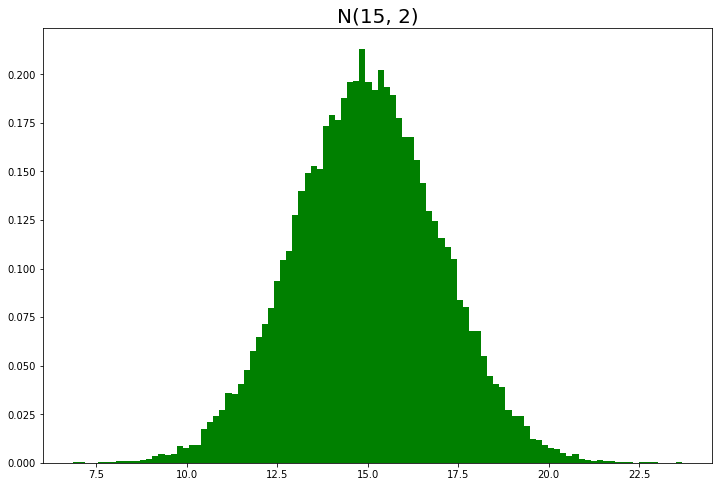

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.hist(simulados,100, density=True, color="green")
plt.title("N(15, 2)", fontsize=20)


Calculamos la media y la varianza de los datos obtenidos


In [26]:
print(f"Media : {np.mean(simulados)}")
print(f"Vairanza : {np.var(simulados)}")

Media : 14.984386677556957
Vairanza : 3.9993380839469497


El test que utilizaremos para comprobar si los datos obetenidos siguen o no a una distribucion normal es el test de Kolmogorov Smirnov

In [75]:
alpha = 0.05

def kolmogorov_smirnov_test():  
    r = st.kstest(simulados, st.norm(MEDIA, DESVIO).cdf)
    if (r.pvalue < alpha):
           print(f"No siguen la distribucion pedida, el p-valor es {r.pvalue}")
    else:
        print("Los datos siguen la distribucion pedida")

In [76]:
kolmogorov_smirnov_test()

Los datos siguen la distribucion pedida
